# Hodgkin-Huxley Equation Tutorial

Eran Shorer
Feb - 2022

## IMPORTS

In [2]:
import numpy as np
import matplotlib.pyplot as mplt
import seaborn as sns
import ipywidgets as widgets
from ipywidgets import Layout

## 1) Action Potentials Intro
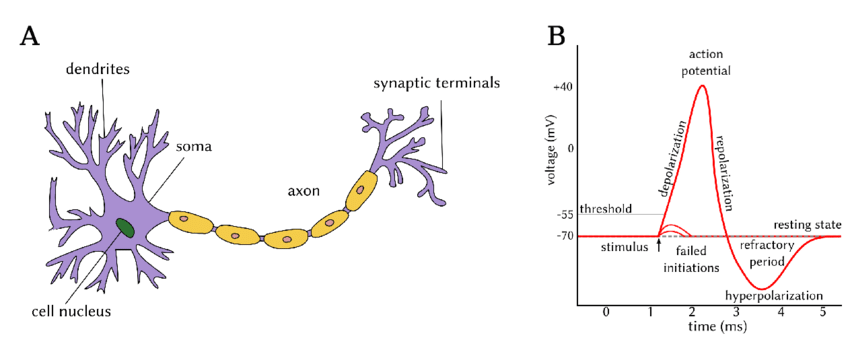

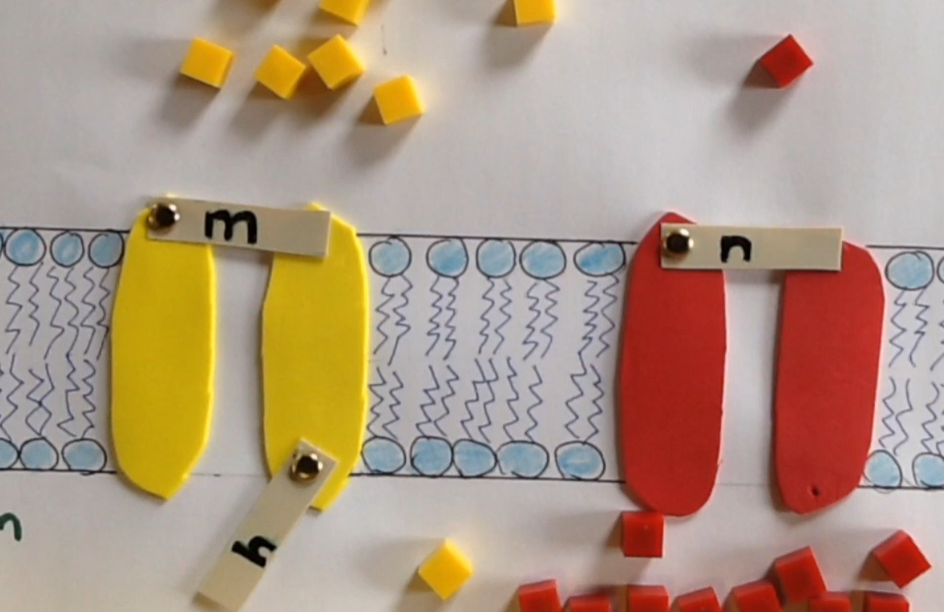



Hodgkin & Huxley used voltage clamp to identify there were fast inactivating sodium currents and delayed potassium currents causing action potentials




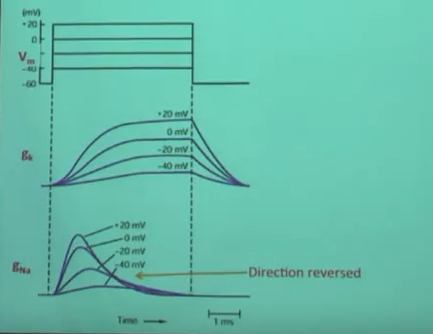

##  2) Outward K+ Current

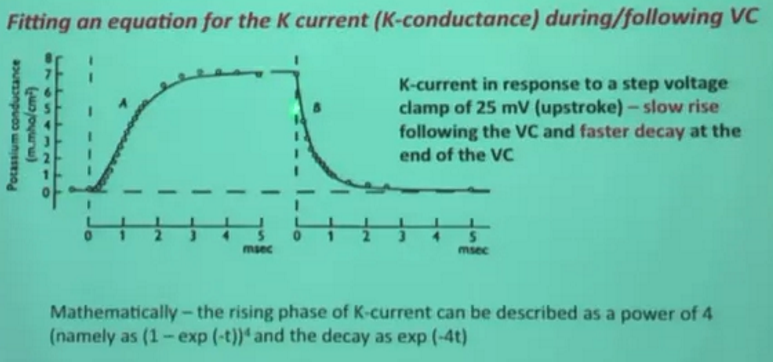

By changing the voltage, the K+ conductance was shown to vary according to voltage and time. 

gk = gk_bar * n^4

n can be thought of as the proportion of potassium channels open.
1-n can be though of as the amount of proportion of potassium channels closed

alpha is the rate of moving unbound channels to bound
beta is the rate of moving bound channels to unbound

It is a value between 0 and 1 that is voltage and time dependant

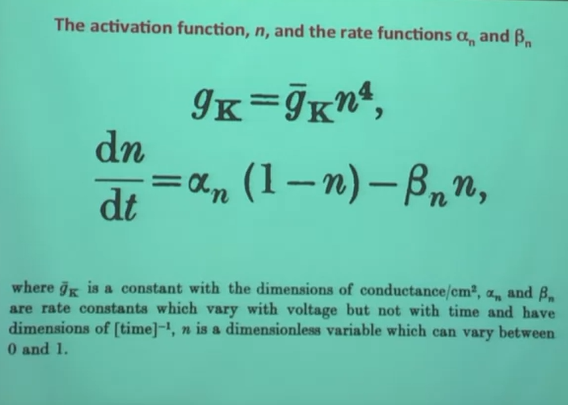

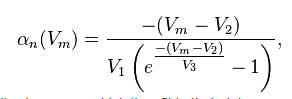
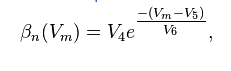

### Potassium Parameters:




Button(description='Run', style=ButtonStyle())

Max gk at -72.6mV = 2e-05 ms/cm^2
Max gk at -60mV = 0.00083 ms/cm^2
Max gk at -40mV = 0.13164 ms/cm^2
Max gk at -20mV = 3.5614 ms/cm^2
Max gk at 0mV = 14.98549 ms/cm^2
Max gk at 20mV = 24.46008 ms/cm^2
Max gk at 40mV = 29.32147 ms/cm^2
Max gk at 60mV = 31.86704 ms/cm^2


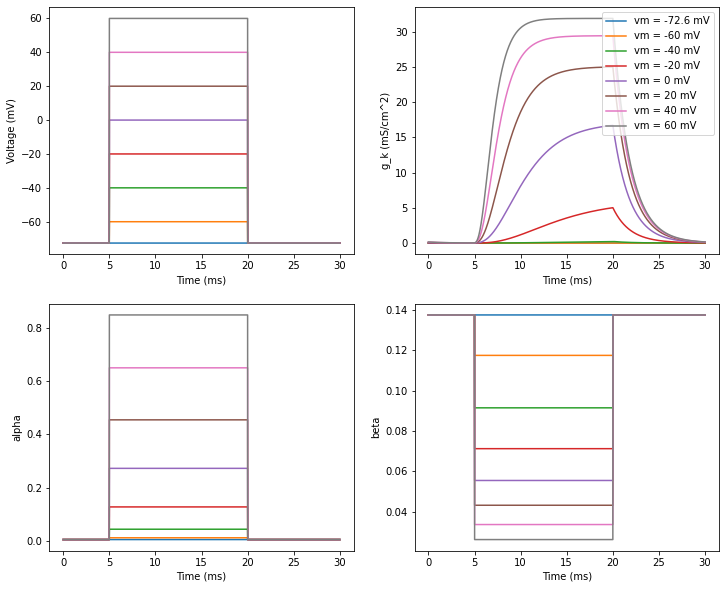

Max gk at -72.6mV = 2e-05 ms/cm^2
Max gk at -60mV = 0.00083 ms/cm^2
Max gk at -40mV = 0.13164 ms/cm^2
Max gk at -20mV = 3.5614 ms/cm^2
Max gk at 0mV = 14.98549 ms/cm^2
Max gk at 20mV = 24.46008 ms/cm^2
Max gk at 40mV = 29.32147 ms/cm^2
Max gk at 60mV = 31.86704 ms/cm^2


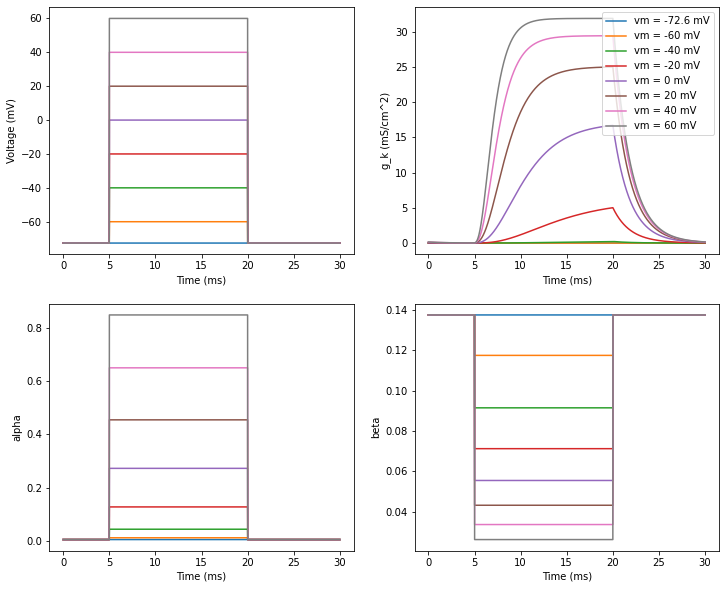

Max gk at -80.0mV = 0.0 ms/cm^2
Max gk at -60mV = 0.00066 ms/cm^2
Max gk at -40mV = 0.12402 ms/cm^2
Max gk at -20mV = 3.49949 ms/cm^2
Max gk at 0mV = 14.91831 ms/cm^2
Max gk at 20mV = 24.43949 ms/cm^2
Max gk at 40mV = 29.3176 ms/cm^2
Max gk at 60mV = 31.86642 ms/cm^2


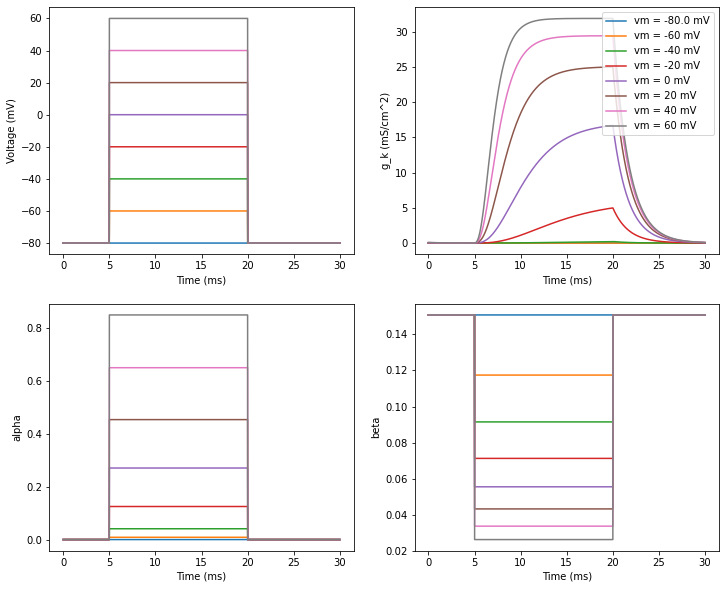

Max gk at -62.0mV = 0.00053 ms/cm^2
Max gk at -60mV = 0.00157 ms/cm^2
Max gk at -40mV = 0.1548 ms/cm^2
Max gk at -20mV = 3.71643 ms/cm^2
Max gk at 0mV = 15.12885 ms/cm^2
Max gk at 20mV = 24.50105 ms/cm^2
Max gk at 40mV = 29.32899 ms/cm^2
Max gk at 60mV = 31.86823 ms/cm^2


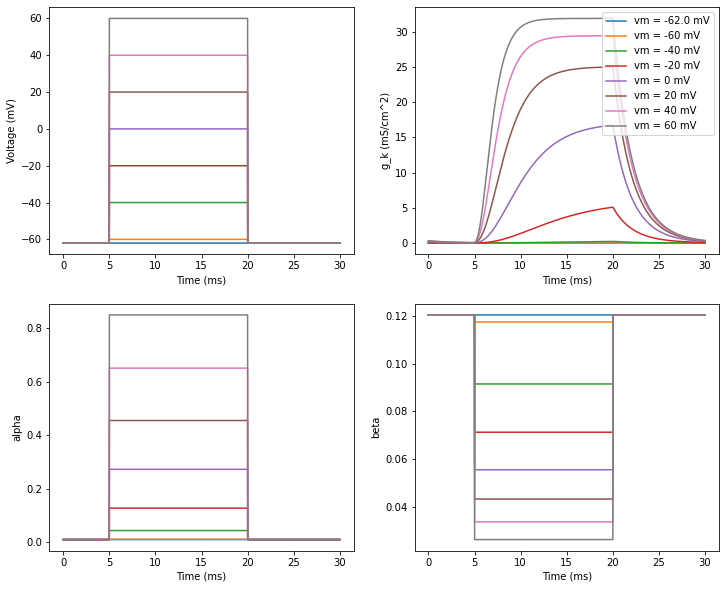

In [11]:

sldr_gbar = widgets.FloatSlider(value=36,min=5,max=60.0,step=0.1,description='g_bar_k:',
                                continuous_update=False,orientation='vertical',readout=True,readout_format='.1f')
sldr_v1 = widgets.FloatSlider(value=100,min=0,max=200.0,step=1,description='V1',
                                continuous_update=False,orientation='vertical',readout=True,readout_format='.1f')
sldr_v2 = widgets.FloatSlider(value=-55,min=-100,max=100.0,step=1,description='V2',
                                continuous_update=False,orientation='vertical',readout=True,readout_format='.1f')
sldr_v3 = widgets.FloatSlider(value=10,min=-100,max=200.0,step=1,description='V3',
                                continuous_update=False,orientation='vertical',readout=True,readout_format='.1f')
sldr_v4 = widgets.FloatSlider(value=0.125,min=-1,max=1.0,step=0.05,description='V4',
                                continuous_update=False,orientation='vertical',readout=True,readout_format='.1f')
sldr_v5 = widgets.FloatSlider(value=-65,min=-100,max=200.0,step=1,description='V5',
                                continuous_update=False,orientation='vertical',readout=True,readout_format='.1f')
sldr_v6 = widgets.FloatSlider(value=80,min=-100,max=200.0,step=1,description='V6',
                                continuous_update=False,orientation='vertical',readout=True,readout_format='.1f')

btn_defaults = widgets.Button(description="Reset to defaults")


def btn_defaults_clicked(b):
    sldr_gbar.value = 36
    sldr_v1.value = 100
    sldr_v2.value = -45
    sldr_v3.value = 10
    sldr_v4.value = 0.125
    sldr_v5.value = -72.6
    sldr_v6.value = 80

btn_defaults.on_click(btn_defaults_clicked)


box_layout = Layout(border='solid',width='70%')

hbox_sldr = widgets.HBox(children=[sldr_gbar,sldr_v1,sldr_v2,sldr_v3,sldr_v4,sldr_v5,sldr_v6,btn_defaults],layout=box_layout)
display(hbox_sldr)

sldr_totalt = widgets.FloatSlider(value=30,min=5,max=100.0,step=1,description='Total time(ms):',
                                continuous_update=True,orientation='horizontal',readout=True,readout_format='.1f')
sldr_dt = widgets.FloatSlider(value=0.001,min=0.001,max=1,step=0.001,description='time step(ms)',
                                continuous_update=False,orientation='horizontal',readout=True,readout_format='.3f')
sldr_clamp_startt = widgets.FloatSlider(value=5,min=0,max=sldr_totalt.value,step=1,description='Clamp start time (ms)',
                                continuous_update=True,orientation='horizontal',readout=True,readout_format='.1f')
sldr_clamp_endt = widgets.FloatSlider(value=20,min=0,max=sldr_totalt.value,step=1,description='Clamp end time (ms)',
                                continuous_update=False,orientation='horizontal',readout=True,readout_format='.1f')

sldr_vm = widgets.FloatSlider(value=-72.6, min=-100, max=0,step=0.1, description='Vm (mv)',
                             continuous_update=False,orientation='horizontal',readout=True,readout_format='.1f')

vbox_timing = widgets.VBox(children=[sldr_totalt,sldr_dt,sldr_clamp_startt,sldr_clamp_endt,sldr_vm],layout=box_layout)
display(vbox_timing)


btn_run = widgets.Button(description="Run")
display(btn_run)

output_run = widgets.Output()


######################################
# SIMULATION RUN
#######################################

def btn_run_clicked(b):

    t_arr,gk_arr,v_arr = [],[],[]
    
    gk_bar = sldr_gbar.value # mS/cm^2
    gk = 0 
    n = 0
    alpha_n = 0
    beta_n = 0

    v1=sldr_v1.value 
    v2=sldr_v2.value 
    v3=sldr_v3.value
    v4=sldr_v4.value 
    v5=sldr_v5.value 
    v6=sldr_v6.value 
    
    t=0
    total_t = sldr_totalt.value
    dt = sldr_dt.value
    clamp_start_t = sldr_clamp_startt.value #ms
    clamp_end_t = sldr_clamp_endt.value #ms
    vm = sldr_vm.value
    v_pre_clamp = vm
    v_clamp_arr = [vm,-60,-40,-20,0,20,40,60]
    
    f_v_clamp, [(ax_v,ax_g),(ax_alpha,ax_beta)] = mplt.subplots(2,2,figsize=(12,10))
    ax_v.set_ylabel("Voltage (mV)")
    ax_v.set_xlabel("Time (ms)")
    ax_g.set_xlabel("Time (ms)")
    ax_g.set_ylabel("g_k (mS/cm^2)")
    ax_alpha.set_xlabel("Time (ms)")
    ax_alpha.set_ylabel("alpha")
    ax_beta.set_xlabel("Time (ms)")
    ax_beta.set_ylabel("beta")
    
    for i in range(len(v_clamp_arr)):
    
        t=0
        t_arr = []
        gk_arr = []
        v_arr = []
        n_arr = []
        alpha_arr = []
        beta_arr = []
        
        while t < total_t:

            t = t+dt

            if clamp_start_t < t < clamp_end_t:
                vm = v_clamp_arr[i]
            else: 
                vm = v_pre_clamp

            #Calculating alpha_n
            numerator = -(vm - v2)
            denominator = v1* ((np.e**((-vm+v2)/v3) -1))
            alpha_n = numerator/denominator

            #Calculating beta_n
            beta_n = v4 * np.e**((-vm+v5)/v6)

            #calculating n
            dn = alpha_n*(1-n) - beta_n*n
            n = n + dn*dt

            #calculating gk
            gk = gk_bar * n**4

            #appending arrays
            t_arr.append(t)
            gk_arr.append(gk)
            v_arr.append(vm)
            alpha_arr.append(alpha_n)
            beta_arr.append(beta_n)
            n_arr.append(n)

        print("Max gk at "+ str(v_clamp_arr[i])+'mV = '+str(round(gk_arr[15000],5)) + ' ms/cm^2')
        ax_g.plot(t_arr,gk_arr, label="vm = "+ str(v_clamp_arr[i])+" mV")
        #ax_g.plot(clamp_end_t, gk_arr[clamp_end_t*1000],"r*")
        ax_g.legend()
        ax_v.plot(t_arr,v_arr)
        ax_alpha.plot(t_arr,alpha_arr)
        ax_beta.plot(t_arr,beta_arr)


    

btn_run.on_click(btn_run_clicked)


## 3) Inward Na current

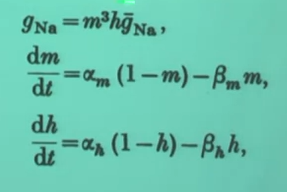

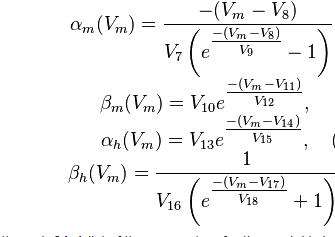

m is the activating portion of the na channel 
h is the inactivating portion of the na channel


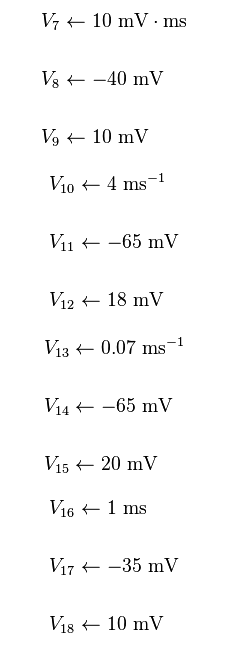

### Sodium Parameters

Button(description='Run', style=ButtonStyle())

Max gk at -72.6mV = 0.0001 ms/cm^2
Max gk at -60mV = 0.0053 ms/cm^2
Max gk at -40mV = 0.3003 ms/cm^2
Max gk at -20mV = 0.4657 ms/cm^2
Max gk at 0mV = 0.2139 ms/cm^2
Max gk at 20mV = 0.0825 ms/cm^2
Max gk at 40mV = 0.0316 ms/cm^2
Max gk at 60mV = 0.0126 ms/cm^2


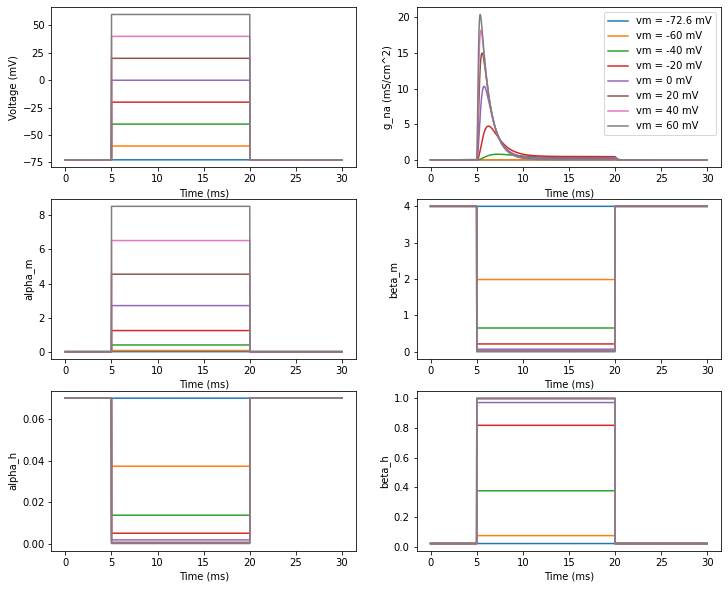

In [18]:
gna_bar = 120 # mS/cm^2
gna = 0
m = 0
h = 0
alpha_m = 0
beta_m = 0
vm = -72.6 #mv

v7 = 10 #mV.ms
v8 = -40 #mV
v9 = 10 #mV
v10 = 4 #ms^-1
v11 = -72.6 #mV
v12 = 18 #mV
v13 = 0.07 #ms^-1
v14 = -72.6 #mV
v15 = 20 #mV
v16 = 1 #ms
v17 = -35 #mV
v18 = 10 #mV


sldr_v7 = widgets.FloatSlider(value=v7,min=0,max=100,step=1,description='V7',
                                continuous_update=False,orientation='vertical',readout=True,readout_format='.1f')
sldr_v8 = widgets.FloatSlider(value=v8,min=-100,max=100.0,step=1,description='V8',
                                continuous_update=False,orientation='vertical',readout=True,readout_format='.1f')
sldr_v9 = widgets.FloatSlider(value=v9,min=-100,max=200.0,step=1,description='V9',
                                continuous_update=False,orientation='vertical',readout=True,readout_format='.1f')
sldr_v10 = widgets.FloatSlider(value=v10,min=-1,max=10,step=0.5,description='V10',
                                continuous_update=False,orientation='vertical',readout=True,readout_format='.1f')
sldr_v11 = widgets.FloatSlider(value=v11,min=-100,max=200.0,step=1,description='V11',
                                continuous_update=False,orientation='vertical',readout=True,readout_format='.1f')
sldr_v12 = widgets.FloatSlider(value=v12,min=-100,max=200.0,step=1,description='V12',
                                continuous_update=False,orientation='vertical',readout=True,readout_format='.1f')


sldr_v13 = widgets.FloatSlider(value=v13,min=0,max=200.0,step=1,description='V13',
                                continuous_update=False,orientation='vertical',readout=True,readout_format='.3f')
sldr_v14 = widgets.FloatSlider(value=v14,min=-100,max=100.0,step=1,description='V14',
                                continuous_update=False,orientation='vertical',readout=True,readout_format='.1f')
sldr_v15 = widgets.FloatSlider(value=v15,min=-100,max=200.0,step=1,description='V15',
                                continuous_update=False,orientation='vertical',readout=True,readout_format='.1f')
sldr_v16 = widgets.FloatSlider(value=v16,min=-1,max=5.0,step=0.05,description='V16',
                                continuous_update=False,orientation='vertical',readout=True,readout_format='.1f')
sldr_v17 = widgets.FloatSlider(value=v17,min=-100,max=200.0,step=1,description='V17',
                                continuous_update=False,orientation='vertical',readout=True,readout_format='.1f')
sldr_v18 = widgets.FloatSlider(value=v18,min=-100,max=200.0,step=1,description='V18',
                                continuous_update=False,orientation='vertical',readout=True,readout_format='.1f')

box_layout = Layout(border='solid',width='70%')

hbox_sldr_m = widgets.HBox(children=[sldr_v7,sldr_v8,sldr_v9,sldr_v10,sldr_v11,sldr_v12],layout=box_layout)
hbox_sldr_h = widgets.HBox(children=[sldr_v13,sldr_v14, sldr_v15,sldr_v16,sldr_v17,sldr_v18],layout=box_layout)
display(hbox_sldr_m,hbox_sldr_h)



sldr_gna = widgets.FloatSlider(value=120,min=0,max=200,step=1,description='g_bar_na:',
                                continuous_update=False,orientation='horizontal',readout=True,readout_format='.1f')
                               

sldr_vm = widgets.FloatSlider(value=-72.6, min=-100, max=0,step=0.1, description='Vm (mv)',
                             continuous_update=False,orientation='horizontal',readout=True,readout_format='.1f')

btn_defaults = widgets.Button(description="Reset to defaults")

sldr_totalt = widgets.FloatSlider(value=30,min=5,max=100.0,step=1,description='Total time(ms):',
                                continuous_update=True,orientation='horizontal',readout=True,readout_format='.1f')
sldr_dt = widgets.FloatSlider(value=0.001,min=0.001,max=1,step=0.001,description='time step(ms)',
                                continuous_update=False,orientation='horizontal',readout=True,readout_format='.3f')
sldr_clamp_startt = widgets.FloatSlider(value=5,min=0,max=sldr_totalt.value,step=1,description='Clamp start time (ms)',
                                continuous_update=True,orientation='horizontal',readout=True,readout_format='.1f')
sldr_clamp_endt = widgets.FloatSlider(value=20,min=0,max=sldr_totalt.value,step=1,description='Clamp end time (ms)',
                                continuous_update=True,orientation='horizontal',readout=True,readout_format='.1f')

vbox_timing = widgets.VBox(children=[sldr_vm,sldr_gna, btn_defaults, sldr_totalt,sldr_dt,sldr_clamp_startt,sldr_clamp_endt],
                           layout=box_layout)
display(vbox_timing)

def btn_defaults_clicked(b):
    sldr_gna.value = 120
    sldr_vm.value = -72.6
    ################
    sldr_v7.value = 10#mV.ms
    sldr_v8.value = -40 #mV
    sldr_v9.value = 10 #mV
    sldr_v10.value = 4 #ms^-1
    sldr_v11.value = -65 #mV
    sldr_v12.value = 18 #mV
    sldr_v13.value = 0.07 #ms^-1
    sldr_v14.value = -65 #mV
    sldr_v15.value = 20 #mV
    sldr_v16.value = 1 #ms
    sldr_v17.value = -35 #mV
    sldr_v18.value = 10 #mV
    

btn_defaults.on_click(btn_defaults_clicked)


btn_run = widgets.Button(description="Run")
display(btn_run)

output_run = widgets.Output()


######################################
# SIMULATION RUN
#######################################

def btn_run_clicked(b):

        
    gna_bar = sldr_gna.value # mS/cm^2
    gna = 0 
    m = 0
    alpha_m = 0
    beta_m = 1
    h = 0
    alpha_h = 0
    beta_h = 1

    v7=sldr_v7.value 
    v8=sldr_v8.value 
    v9=sldr_v9.value
    v10=sldr_v10.value 
    v11=sldr_v11.value 
    v12=sldr_v12.value 
    
    v13=sldr_v13.value 
    v14=sldr_v14.value 
    v15=sldr_v15.value
    v16=sldr_v16.value 
    v17=sldr_v17.value 
    v18=sldr_v18.value 
    
    t=0
    total_t = sldr_totalt.value
    dt = sldr_dt.value
    clamp_start_t = sldr_clamp_startt.value #ms
    clamp_end_t = sldr_clamp_endt.value #ms
    vm = sldr_vm.value
    v_pre_clamp = vm
    v_clamp_arr = [vm,-60,-40,-20,0,20,40,60]
    
    f_v_clamp, [(ax_v,ax_g),(ax_alpha_m,ax_beta_m),(ax_alpha_h,ax_beta_h)] = mplt.subplots(3,2,figsize=(12,10))
    ax_v.set_ylabel("Voltage (mV)")
    ax_v.set_xlabel("Time (ms)")
    ax_g.set_xlabel("Time (ms)")
    ax_g.set_ylabel("g_na (mS/cm^2)")
    ax_alpha_m.set_xlabel("Time (ms)")
    ax_alpha_m.set_ylabel("alpha_m")
    ax_beta_m.set_xlabel("Time (ms)")
    ax_beta_m.set_ylabel("beta_m")
    ax_alpha_h.set_xlabel("Time (ms)")
    ax_alpha_h.set_ylabel("alpha_h")
    ax_beta_h.set_xlabel("Time (ms)")
    ax_beta_h.set_ylabel("beta_h")
    
    for i in range(len(v_clamp_arr)):
    
        t=0
        t_arr = []
        gna_arr = []
        v_arr = []
        m = 0  
        h = 0
        alpha_h_arr, beta_h_arr = [],[]
        alpha_m_arr, beta_m_arr = [],[]
  
        while t < total_t:

            t = t+dt

            if clamp_start_t < t < clamp_end_t:
                vm = v_clamp_arr[i]
            else: 
                vm = v_pre_clamp

             #Calculating alpha_m
            numerator = -vm + v8
            denominator = v7 * (np.exp((-vm+v8)/v9)-1)
            alpha_m = numerator/denominator
    
            #Calculating beta_m
            beta_m = v10 * np.exp((-vm+v11)/v12)
    
            #calculating m
            dm = alpha_m*(1-m) - beta_m*m
            m = m + dm*dt
    
            #Calculating alpha_h

            alpha_h = v13* (np.exp((-vm+v14)/v15))
    
            #Calculating beta_h
    
            beta_h = 1/(v16 * (np.exp((-vm+v17)/v18)+1))
    
            #calculating h
            dh = alpha_h*(1-h) - beta_h*h
            h = h + dh*dt

            #calculating gna
            gna = (m**3)*h*gna_bar 
    
            #appending arrays
            t_arr.append(t)
            gna_arr.append(gna)
            v_arr.append(vm)
            alpha_m_arr.append(alpha_m)
            beta_m_arr.append(beta_m)
            alpha_h_arr.append(alpha_h)
            beta_h_arr.append(beta_h)



        print("Max gk at "+ str(v_clamp_arr[i])+'mV = '+str(round(gna_arr[15000],4)) + ' ms/cm^2')
        ax_g.plot(t_arr,gna_arr, label="vm = "+ str(v_clamp_arr[i])+" mV")
        #ax_g.plot(clamp_end_t, gk_arr[clamp_end_t*1000],"r*")
        ax_g.legend()
        ax_v.plot(t_arr,v_arr)
        ax_alpha_m.plot(t_arr,alpha_m_arr)
        ax_beta_m.plot(t_arr,beta_m_arr)
        ax_alpha_h.plot(t_arr,alpha_h_arr)
        ax_beta_h.plot(t_arr,beta_h_arr)

    

    
btn_run.on_click(btn_run_clicked)

